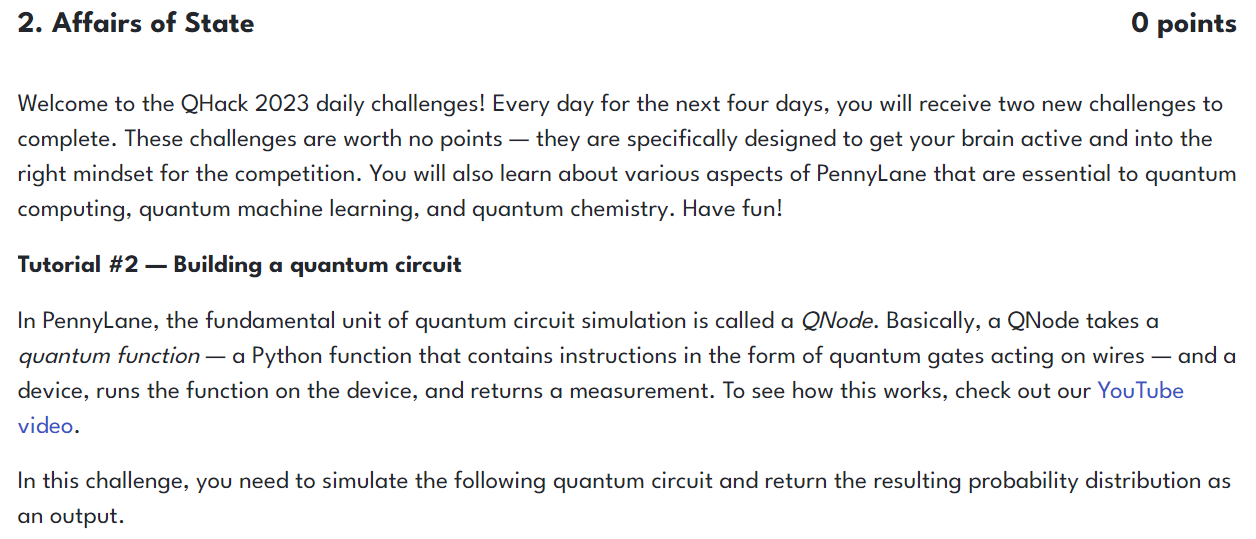

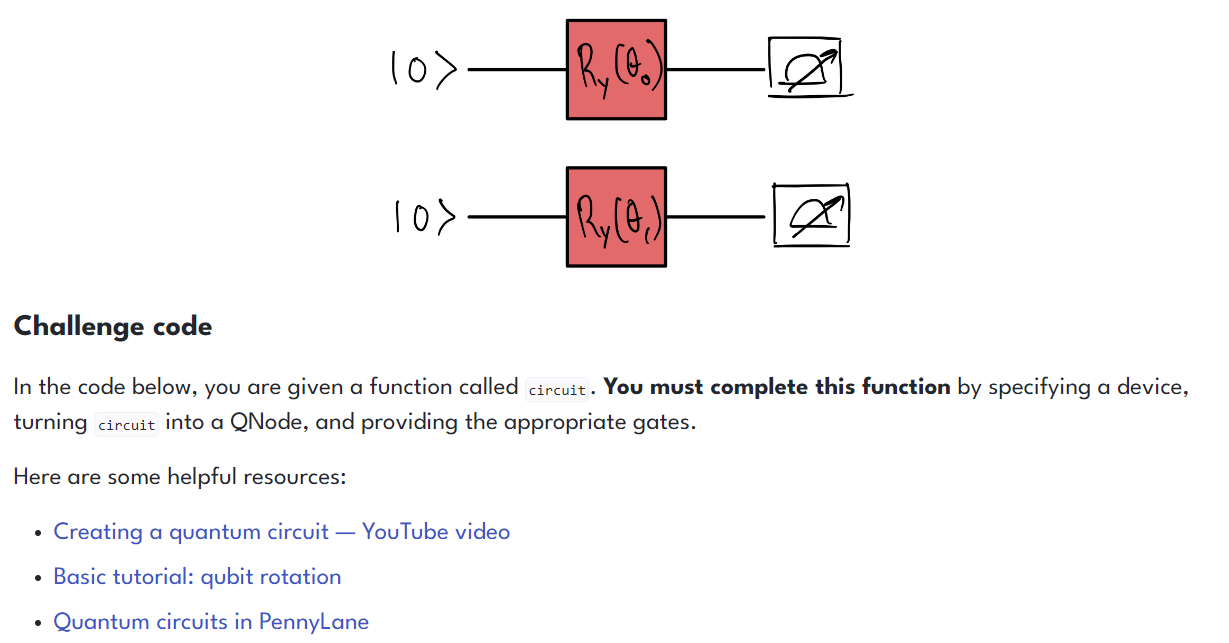

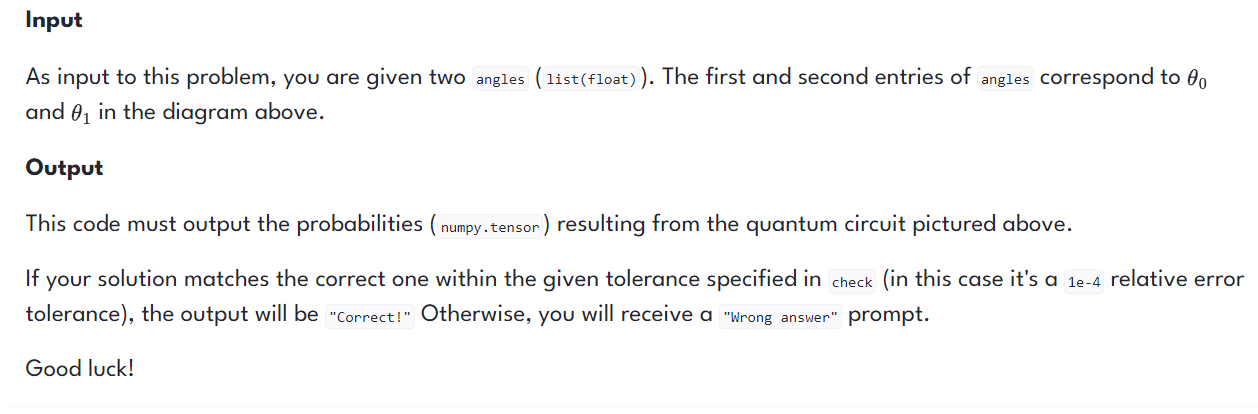

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

# Put your code here #

# Create a default.qubit device with 2 qubits / wires using qml.device
dev = qml.device("default.qubit", wires=2)
# Turn your circuit into a QNode
@qml.qnode(dev)
def circuit(angles):
    """The quantum circuit that you will simulate.

    Args:
        angles (list(float)): The gate angles in the circuit.

    Returns:
        (numpy.tensor): 
            The probability vector of the underlying quantum state that this circuit produces.
    """
    # Put the rotation gates here
    qml.RY(angles[0], wires=0)
    qml.RY(angles[1], wires=1)
    
    return qml.probs(wires=[0, 1])


# These functions are responsible for testing the solution. 
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(angles).tolist()

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)
    


test_cases = [['[1.23, 4.56]', '[0.2829251572359589, 0.3841937063262924, 0.1411749135148633, 0.19170622292288542]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")